# Word2vec (SkipGram)

## Data preparation for SkipGram
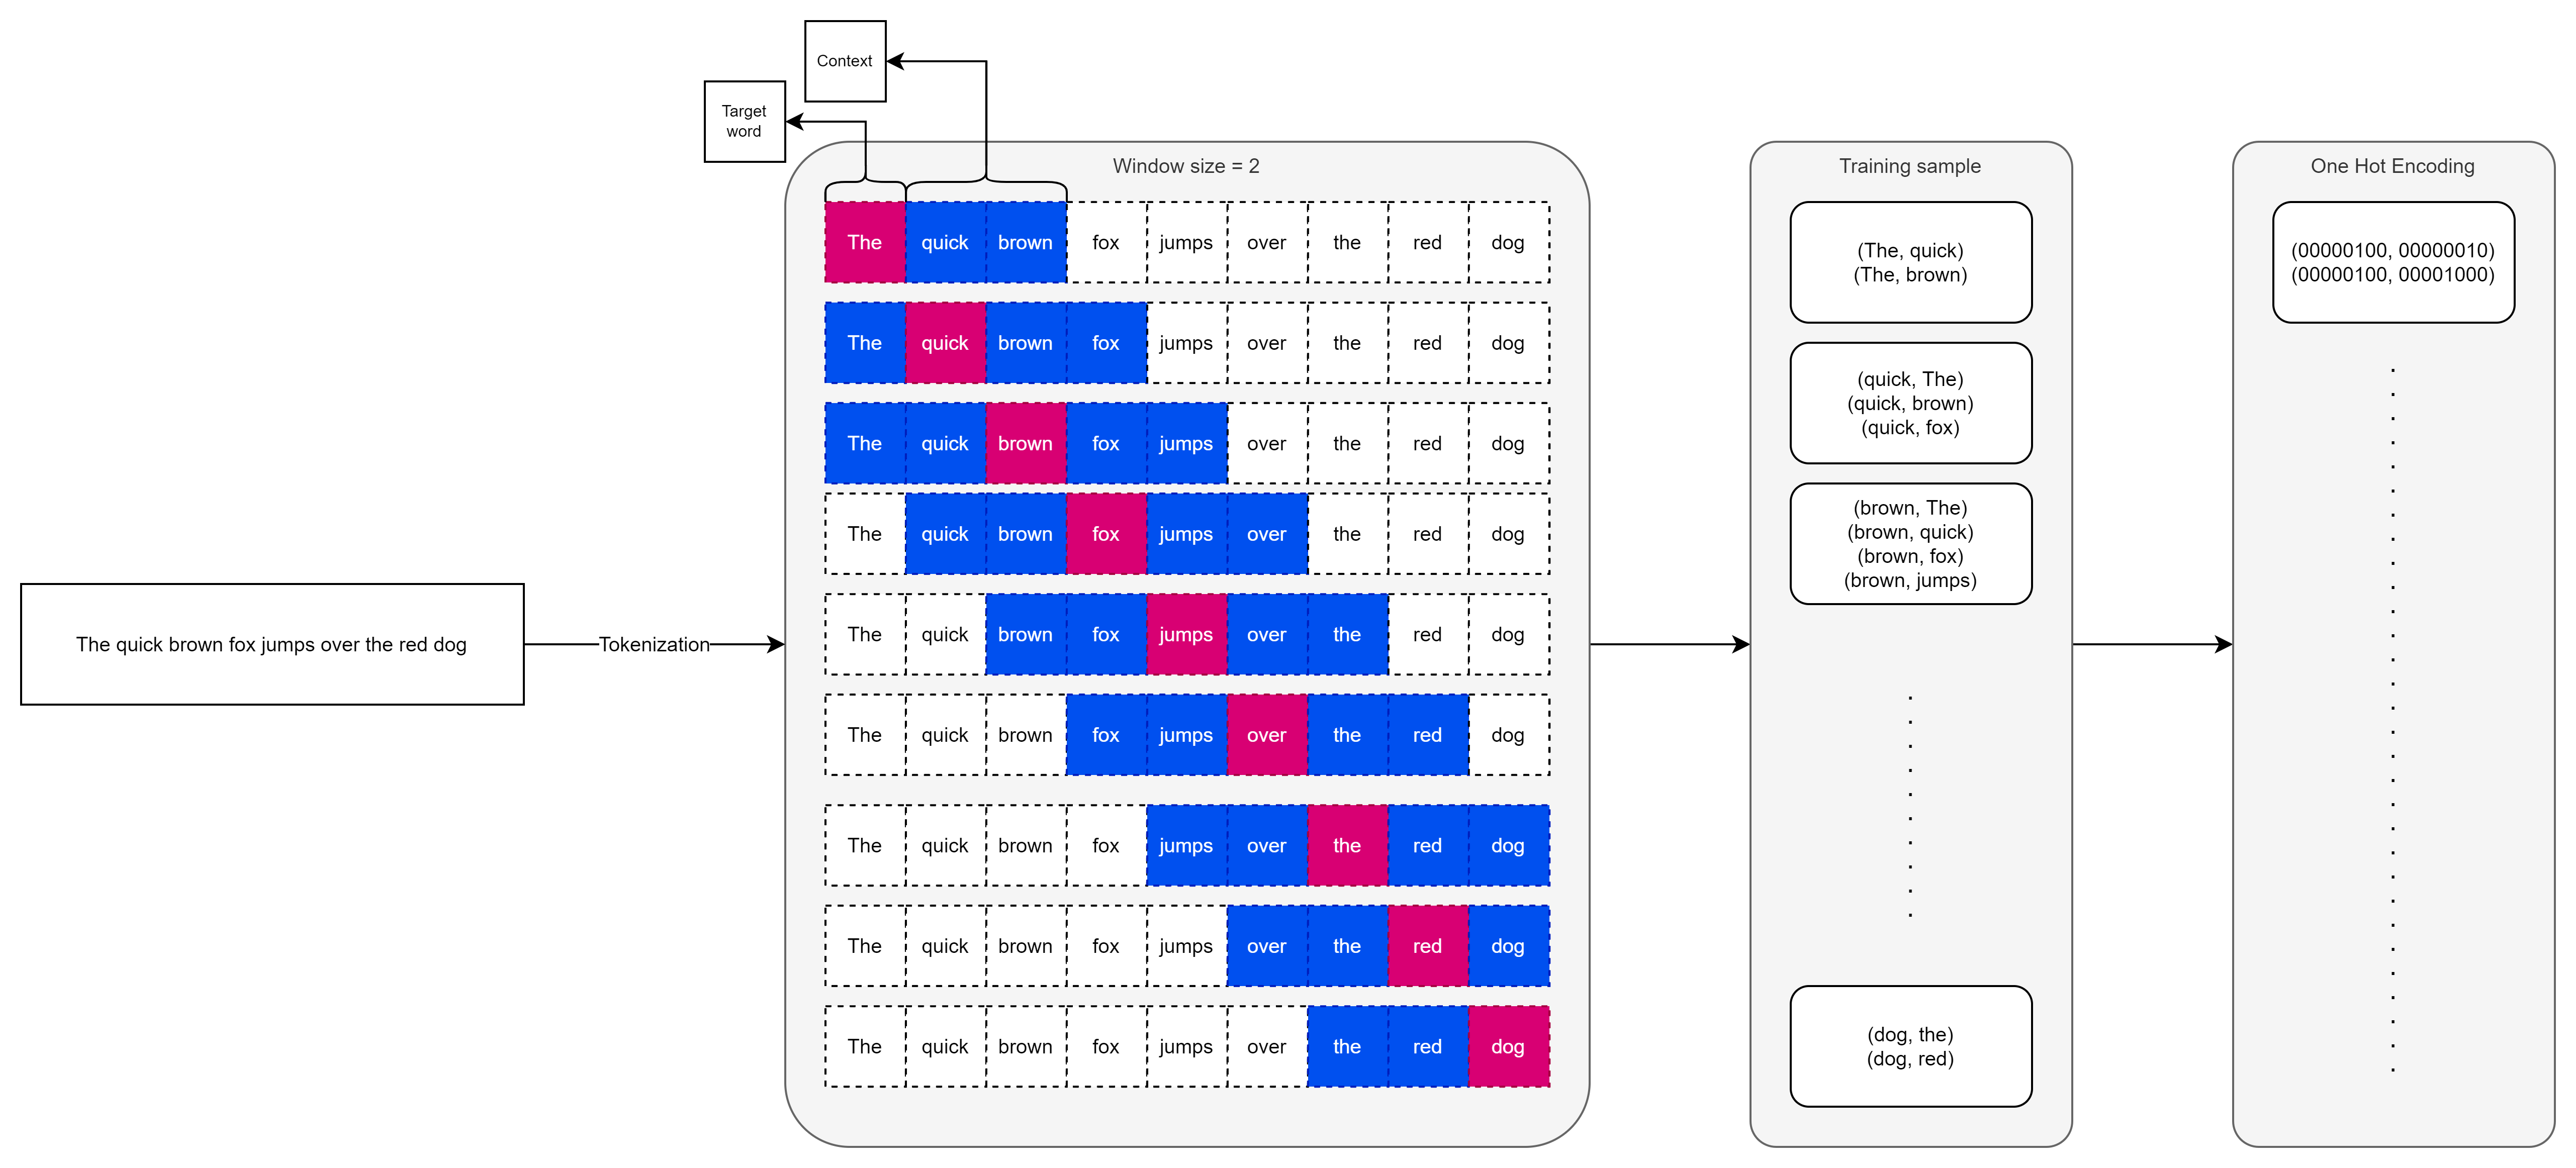

## Neural network architecture
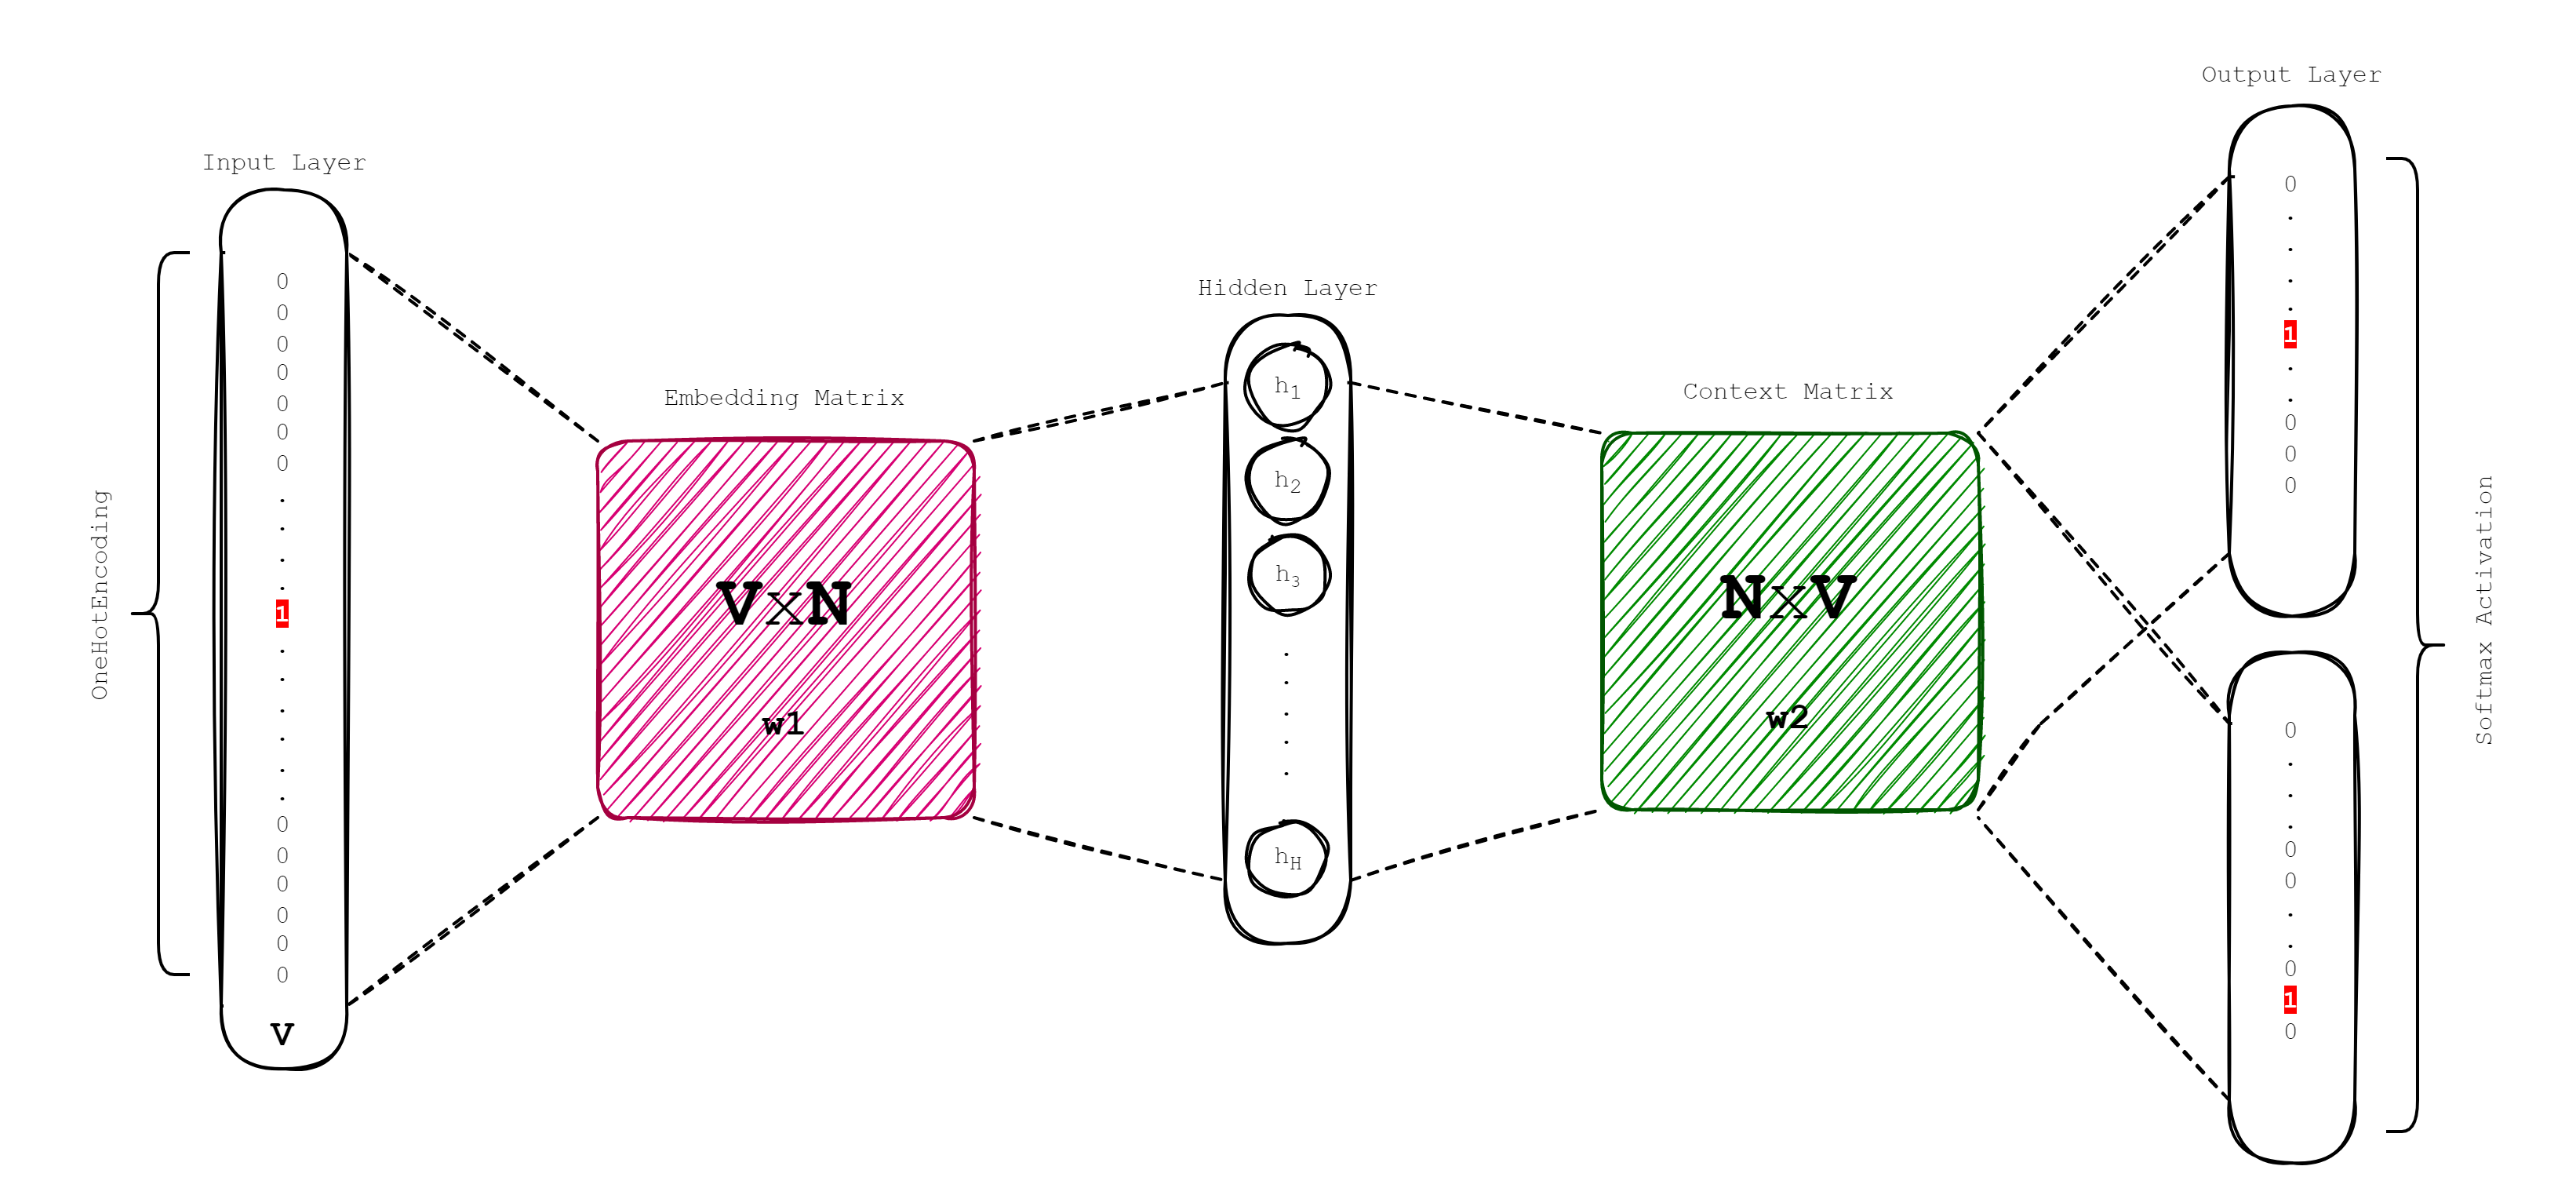
* V:    Number of unique words in our corpus of text (Vocabulary)
* X:    Input layer (One hot encoding of our input word)
* N:    Embedding dimension
* W1:   Weights between input layer and hidden layer
* W2:   Weights between hidden layer and output layer

In [101]:
import re
import numpy as np
from typing import List, Dict, Iterable
import matplotlib.pyplot as plt

In [19]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [91]:
def tokenizer(text: str) -> List[str]:
    pattern = re.compile(r'[\w\']+')
    return pattern.findall(text.lower())

def vocabularyLookup(tokens: List[str]) -> Dict:
    word_to_id = {}
    id_to_word = {}
    
    for id, token in enumerate(set(tokens)):
        word_to_id[token] = id
        id_to_word[id] = token
        
    return word_to_id, id_to_word


def concat(*iterables: Iterable) -> Iterable:
    for iterable in iterables:
        yield from iterable

        
def one_hot_encode(id: int, vocab_size: int) -> List[int]:
    res = [0] * vocab_size
    res[id] = 1
    return res

def generate_training_data(tokens: List[str], word_to_id: Dict, window: int = 2) -> np.array:
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)
    


In [98]:
tokens = tokenizer(text)
word_to_id, id_to_word = vocabularyLookup(tokens)
X, y = generate_training_data(tokens, word_to_id, 2)
assert X.shape == y.shape

In [125]:
def softmax(X):
        res = []
        for x in X:
            exp = np.exp(x)
            res.append(exp / exp.sum())
        return res
    
class Word2vec:
    
    def __init__(self, vocab_size, n_embedding):
        self.w1 = np.random.randn(vocab_size, n_embedding)
        self.w2 = np.random.randn(n_embedding, vocab_size)


    def forward(self, X, return_cache=True):
        cache = {}

        cache["a1"] = np.dot(X, self.w1)
        cache["a2"] = np.dot(cache["a1"], self.w2)
        cache["z"] = softmax(cache["a2"])

        if not return_cache:
            return cache["z"]
        return cache

    def backward(self, X, y, alpha):
        cache  = self.forward(X)
        da2 = cache["z"] - y
        dw2 = np.dot(cache["a1"].T, da2)
        da1 = np.dot(da2, self.w2.T)
        dw1 = np.dot(X.T, da1)
        assert(dw2.shape == self.w2.shape)
        assert(dw1.shape == self.w1.shape)
        self.w1 -= alpha * dw1
        self.w2 -= alpha * dw2
        return cross_entropy(cache["z"], y)

    def cross_entropy(self, z, y):
        return - np.sum(np.log(z) * y)

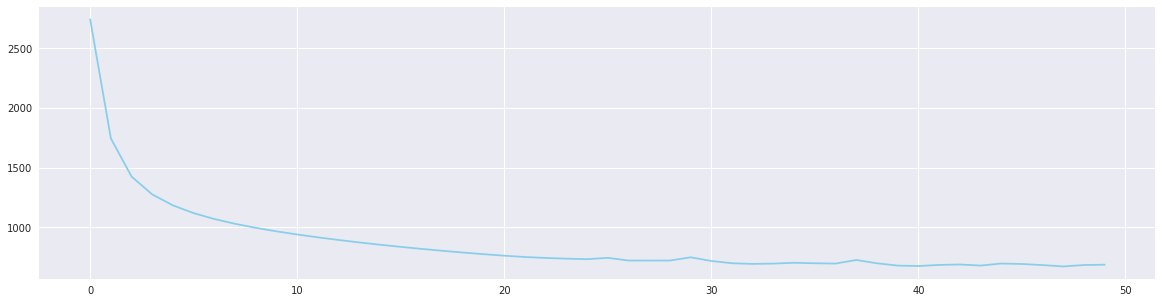

In [126]:
plt.style.use("seaborn")
plt.figure(figsize=(20, 5))
n_iter = 50
learning_rate = 0.05
model = Word2vec(len(word_to_id), 10)

history = [model.backward(X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

## Embedding

In [109]:
model["w1"]

array([[-0.02652686, -1.50236017, -0.82949572,  1.14406115, -0.15610315,
         1.19136419, -0.14256283, -1.40118605,  0.65003126, -0.67219565],
       [ 0.67210426, -0.49950705, -0.20547173,  3.11903344,  0.88686766,
        -0.68051642,  0.17435014, -0.98108862, -0.98683855, -0.54347267],
       [-1.22426153,  1.53222476, -1.29924169,  0.61775681, -1.67096095,
        -0.18540395,  0.32205648,  0.43645897, -0.77733465,  0.72931586],
       [-0.42010434, -0.54555183,  0.39036737, -0.31259066,  1.49622279,
         1.41841225,  1.49423952, -0.78297109,  1.02103667, -1.9266676 ],
       [-0.05234854, -0.51956506, -2.21389892, -0.23832842,  1.14704265,
         1.16007557,  1.23934965,  0.20438814,  0.95553747, -0.23296049],
       [-0.73010783,  1.48563924,  0.82155332, -0.3371078 ,  0.28550309,
         1.12548323, -1.30598362,  1.7372925 , -0.67196511, -0.25083107],
       [-0.30399499,  0.89124958,  0.65358249, -0.73680327, -0.1413076 ,
        -1.30209089, -0.50828515,  0.05445744

# Links
* https://jaketae.github.io/study/word2vec/
* https://www.geeksforgeeks.org/implement-your-own-word2vecskip-gram-model-in-python/